In [1]:
import data_utils

folder_path = 'Datasets/hair-seg.v6i.coco-segmentation/train'

hair_dataset = data_utils.HairDataset(folder_path)

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


In [2]:
image, target = hair_dataset[1]

print(image)
print(target)
print(target['masks'].shape)

tensor([[[0.9412, 0.9137, 0.8667,  ..., 0.1529, 0.1608, 0.1647],
         [0.9255, 0.8863, 0.8314,  ..., 0.1608, 0.1647, 0.1686],
         [0.9020, 0.8471, 0.7725,  ..., 0.1765, 0.1843, 0.1843],
         ...,
         [0.0706, 0.0706, 0.0745,  ..., 0.0667, 0.0627, 0.0627],
         [0.0745, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         [0.0784, 0.0745, 0.0745,  ..., 0.0745, 0.0706, 0.0745]],

        [[0.8157, 0.7961, 0.7490,  ..., 0.1020, 0.1098, 0.1137],
         [0.8000, 0.7686, 0.7137,  ..., 0.1098, 0.1137, 0.1176],
         [0.7765, 0.7294, 0.6549,  ..., 0.1216, 0.1255, 0.1255],
         ...,
         [0.1843, 0.1843, 0.1882,  ..., 0.1647, 0.1608, 0.1608],
         [0.1882, 0.1882, 0.1882,  ..., 0.1608, 0.1686, 0.1686],
         [0.1922, 0.1882, 0.1882,  ..., 0.1647, 0.1686, 0.1725]],

        [[0.6667, 0.6471, 0.6078,  ..., 0.0706, 0.0863, 0.0902],
         [0.6510, 0.6196, 0.5725,  ..., 0.0784, 0.0902, 0.0941],
         [0.6275, 0.5804, 0.5059,  ..., 0.0863, 0.0980, 0.

/home/ibster/Desktop/NetFM/data_utils.py:63: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  target['masks'] = torch.tensor(target['masks']).to(device)


In [3]:
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

num_classes = 2

model = torchvision.models.detection.maskrcnn_resnet50_fpn(weights="DEFAULT")

in_features = model.roi_heads.box_predictor.cls_score.in_features

model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels

hidden_layer_size = 256

model.roi_heads.mask_predictor = MaskRCNNPredictor(
    in_features_mask,
    hidden_layer_size,
    num_classes
)

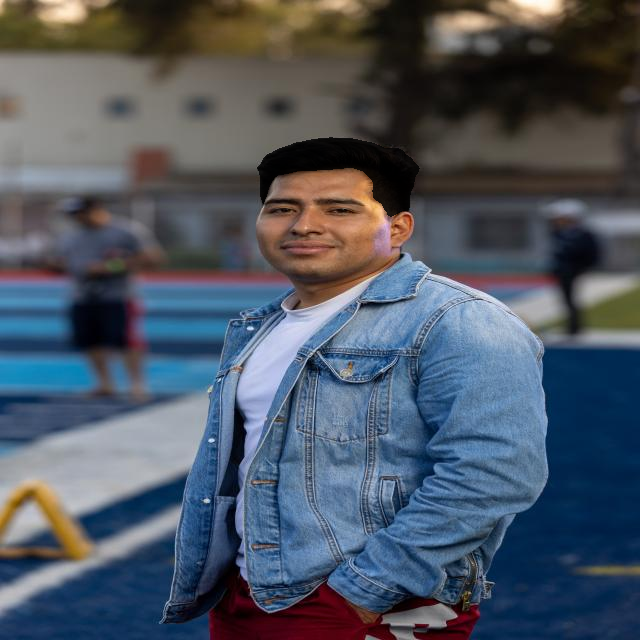

In [4]:
from visual_utils import DrawMasks
from torchvision.models.detection import MaskRCNN_ResNet50_FPN_Weights



visualiser = DrawMasks(model, MaskRCNN_ResNet50_FPN_Weights.DEFAULT.transforms(), 'cuda')

visualiser.draw_masks_from_tensor_and_masks(image, target['masks'].to('cpu'))

In [5]:
from torch.utils.data import DataLoader

hair_dataloader = DataLoader(
    hair_dataset,
    batch_size = 2,
    collate_fn=lambda batch: tuple(zip(*batch))
)

images, targets = next(iter(hair_dataloader))

In [6]:
model.eval()

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model.to(device)

predictions = model(images)

In [7]:
predictions

[{'boxes': tensor([[1.9317e+02, 1.0532e+02, 2.8415e+02, 2.3513e+02],
          [5.3004e+02, 1.6614e+02, 5.8192e+02, 2.2200e+02],
          [1.5752e+02, 1.7567e+02, 2.1346e+02, 2.2827e+02],
          [3.9572e+02, 2.6068e+02, 5.7748e+02, 6.4000e+02],
          [1.5765e+02, 1.3354e+02, 2.6770e+02, 2.3838e+02],
          [3.4939e+01, 1.5676e+02, 1.1984e+02, 2.4363e+02],
          [1.9690e+02, 1.3618e+02, 2.3703e+02, 2.4241e+02],
          [1.0559e+02, 1.9248e+02, 2.1902e+02, 2.2754e+02],
          [6.1980e+02, 1.8023e+02, 6.3717e+02, 2.1341e+02],
          [3.0961e+02, 2.7088e+02, 3.6031e+02, 5.4819e+02],
          [1.8341e+02, 1.5887e+02, 2.0235e+02, 1.8314e+02],
          [5.5639e+02, 1.6091e+02, 5.8497e+02, 2.2153e+02],
          [1.6959e+02, 1.9463e+02, 2.0201e+02, 2.2549e+02],
          [7.9626e+01, 1.6273e+02, 2.1069e+02, 2.2926e+02],
          [2.2105e+02, 1.5114e+02, 2.5796e+02, 2.3708e+02],
          [1.8007e+02, 1.9312e+02, 2.1472e+02, 2.2450e+02],
          [1.4098e+02, 2.0369e+

torch.Size([1, 3, 599, 337])


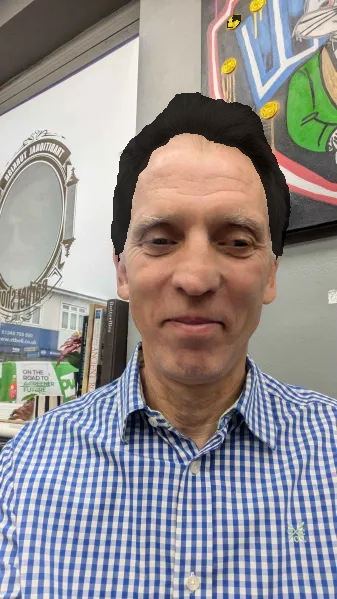

In [15]:
dave_image_path = "Datasets/test/dave_before.webp"

image = visualiser.draw_mask_from_image_path_and_model(dave_image_path)

image

In [9]:
import torch

from training_loop import train

model.to(device)

#train(model, hair_dataloader, epochs=1)

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [12]:
state_dict = torch.load('My Model.pt')

model.load_state_dict(state_dict)

/tmp/ipykernel_123595/1144344415.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load('My Model.pt')


<All keys matched successfully>

torch.Size([1, 3, 599, 337])


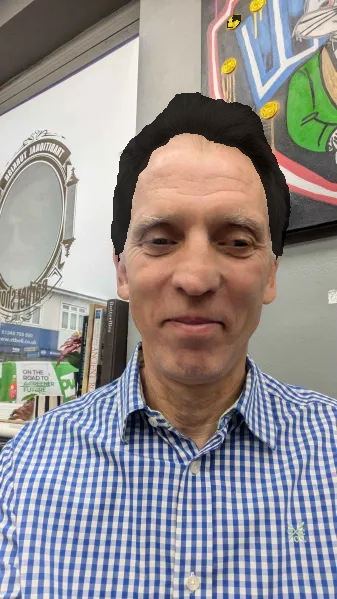

In [13]:
dave_image_path = "Datasets/test/dave_before.webp"

image = visualiser.draw_mask_from_image_path_and_model(dave_image_path)

image

In [11]:
import tempfile

with tempfile.TemporaryFile() as file:
    tempfile = image
    print(dir(image))
    print(image.path())

['_Image__transformer', '__annotations__', '__array_interface__', '__class__', '__copy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_close_exclusive_fp_after_loading', '_close_fp', '_copy', '_crop', '_dump', '_ensure_mutable', '_exif', '_expand', '_get_safe_box', '_mode', '_new', '_reload_exif', '_repr_image', '_repr_jpeg_', '_repr_png_', '_repr_pretty_', '_size', 'alpha_composite', 'apply_transparency', 'close', 'convert', 'copy', 'crop', 'draft', 'effect_spread', 'encoderconfig', 'encoderinfo', 'entropy', 'filter', 'format', 'format_description', 'frombytes', 'get_child_images', 'getbands', 'getbbox', 'getchannel', 'getcolors', 'getdata', 'ge

AttributeError: 'Image' object has no attribute 'path'